In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from PIL import Image

pd.set_option('display.max_rows', None)

In [2]:
df_train = pd.read_excel('../OIA_ODIR/Training_Set/Annotation/training_annotation.xlsx', engine='openpyxl')

# Exploratory data analysis

In [3]:
df_train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [4]:
df_train.shape

(3500, 15)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         3500 non-null   int64 
 1   Patient Age                3500 non-null   int64 
 2   Patient Sex                3500 non-null   object
 3   Left-Fundus                3500 non-null   object
 4   Right-Fundus               3500 non-null   object
 5   Left-Diagnostic Keywords   3500 non-null   object
 6   Right-Diagnostic Keywords  3500 non-null   object
 7   N                          3500 non-null   int64 
 8   D                          3500 non-null   int64 
 9   G                          3500 non-null   int64 
 10  C                          3500 non-null   int64 
 11  A                          3500 non-null   int64 
 12  H                          3500 non-null   int64 
 13  M                          3500 non-null   int64 
 14  O       

In [6]:
df_train['Patient Sex'].value_counts()

Male      1885
Female    1615
Name: Patient Sex, dtype: int64

In [7]:
df_train['N'].value_counts()

0    2360
1    1140
Name: N, dtype: int64

In [8]:
df_train['Left-Diagnostic Keywords'].nunique()

227

In [9]:
df_train['Right-Diagnostic Keywords'].nunique()

233

In [10]:
df_train['Left-Diagnostic Keywords'].value_counts()[:30]

normal fundus                                                      1433
moderate non proliferative retinopathy                              366
mild nonproliferative retinopathy                                   220
cataract                                                            135
pathological myopia                                                 111
lens dust，normal fundus                                             110
glaucoma                                                            104
dry age-related macular degeneration                                 93
severe nonproliferative retinopathy                                  70
drusen                                                               66
epiretinal membrane                                                  54
hypertensive retinopathy                                             53
macular epiretinal membrane                                          49
normal fundus，lens dust                                         

In [11]:
df_train['Right-Diagnostic Keywords'].value_counts()[:30]

normal fundus                                                         1383
moderate non proliferative retinopathy                                 379
mild nonproliferative retinopathy                                      240
cataract                                                               127
pathological myopia                                                    116
lens dust，normal fundus                                                112
dry age-related macular degeneration                                   103
glaucoma                                                                96
severe nonproliferative retinopathy                                     74
drusen                                                                  72
macular epiretinal membrane                                             71
epiretinal membrane                                                     55
hypertensive retinopathy                                                51
myelinated nerve fibers  

<Figure size 600x400 with 0 Axes>

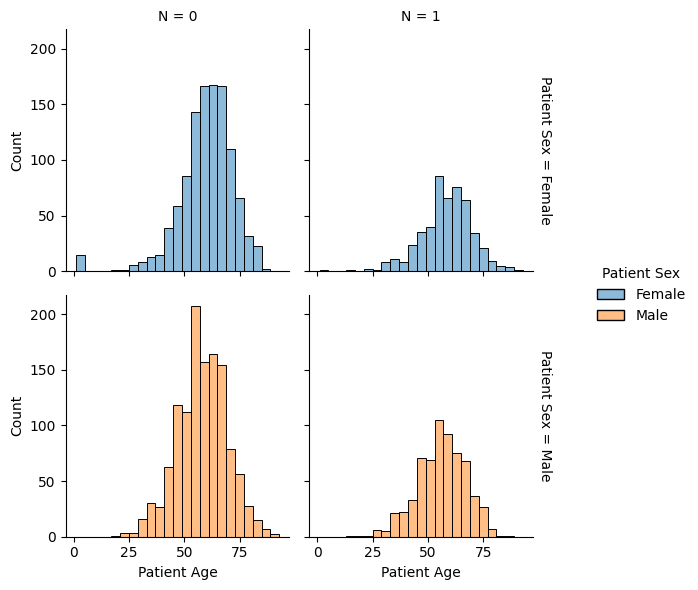

In [12]:
plt.figure(figsize=(6,4), facecolor='white')

sns.displot(
    df_train, 
    x="Patient Age", 
    col="N", 
    row='Patient Sex',
    binwidth=4, 
    height=3, 
    hue='Patient Sex',
    facet_kws=dict(margin_titles=True),)
plt.show()

In [13]:
# number of images in the training set
len(glob.glob("../OIA_ODIR/Training_Set/Images/*.jpg"))

7000

In [14]:
# number of images in the testing set
len(glob.glob("../OIA_ODIR/On-site_TestSet/Images/*.jpg"))

2000

In [15]:
# number of images in the validation set
len(glob.glob("../OIA_ODIR/Off-site_TestSet/Images/*.jpg"))

1000

Original size : (1444, 1444)


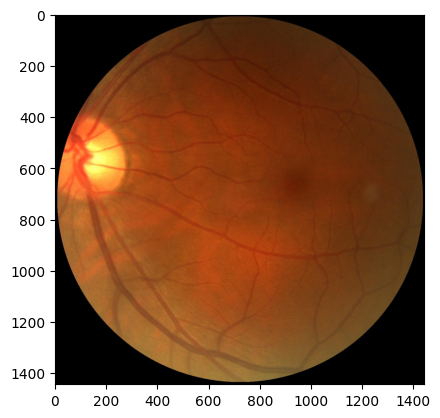

In [16]:
image = Image.open('../dat/train/male/173_left.jpg')
print(f"Original size : {image.size}")
plt.imshow(image)
plt.show()

In [17]:
img_list = glob.glob("../dat/train/male/*.jpg")

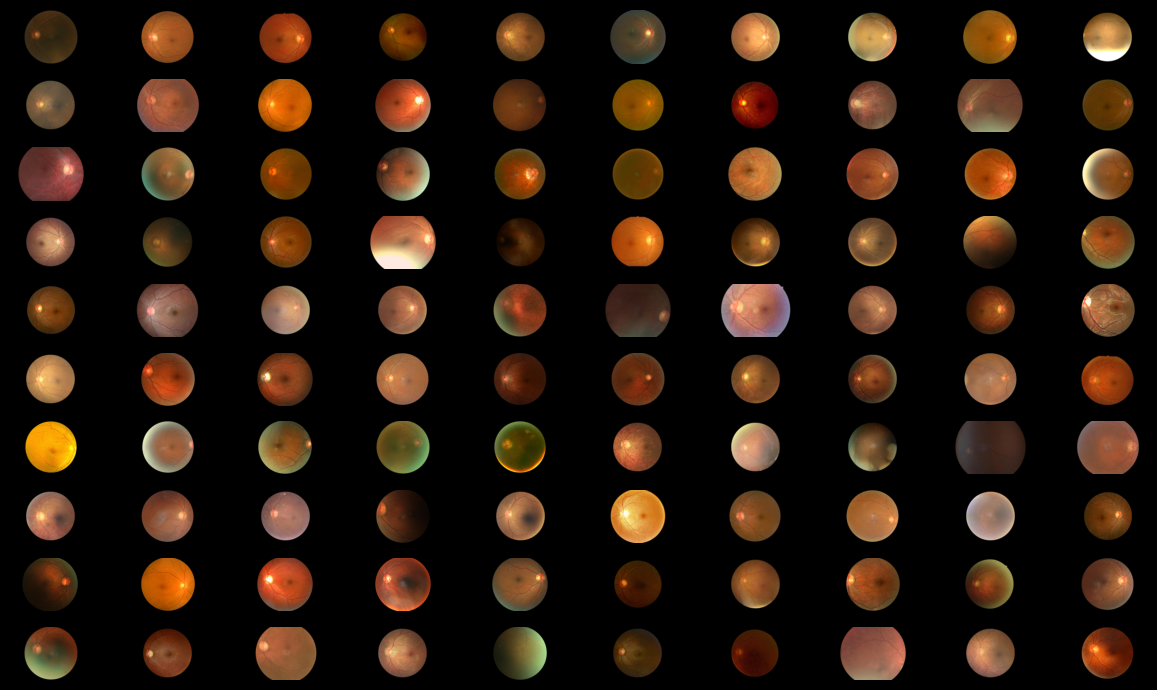

In [18]:
plt.figure(figsize=(12,7), facecolor='k')
i = 0
img_list_rnd = random.sample(img_list, 100)

for img in img_list_rnd:
    plt.subplot(10, 10, i+1)
    # image = plt.imread(img)
    image = Image.open(img)
    image.thumbnail((150, 150))
    plt.imshow(image)
    i += 1
    plt.axis('off')    
plt.tight_layout()

In [19]:
left_image=[]
left_label=[]
for i,j in zip(df_train['Left-Fundus'],df_train['Left-Diagnostic Keywords']):
    
  #print(i,j)
    if j=='normal fundus':
        left_label.append('N'),left_image.append(i)
    elif any(j==s for s in ['dry age-related macular degeneration' , 'wet age-related macular degeneration']): 
        left_label.append('A'),left_image.append(i)
    elif any(j==s for s in ['diabetic retinopathy' , 'moderate non proliferative retinopathy' ,'mild nonproliferative retinopathy']):
        left_label.append('D'),left_image.append(i)
    elif any(j==s for s in ['glaucoma', 'suspected glaucoma']):
        left_label.append('G'),left_image.append(i)
    elif j=='cataract':
        left_label.append('C'),left_image.append(i)
    elif j=='hypertensive retinopathy':
        left_label.append('H'),left_image.append(i) 
    elif j=='pathological myopia':
        left_label.append('M'),left_image.append(i)
    else: 
        left_label.append('O'),left_image.append(i)

In [54]:
left_df=pd.DataFrame(zip(left_image,left_label),columns=['Left-Fundus','Label'])

In [55]:
left_df.head()

,Left-Fundus,Label
0,0_left.jpg,C
1,1_left.jpg,N
2,2_left.jpg,O
3,3_left.jpg,N
4,4_left.jpg,O


In [56]:
left_df.Label.value_counts()

N    1433
O     942
D     596
C     135
A     115
G     115
M     111
H      53
Name: Label, dtype: int64

In [58]:
df_left = pd.merge(left_df, df_train, on="Left-Fundus")

In [59]:
df_left.Label.value_counts()

N    1433
O     942
D     596
C     135
A     115
G     115
M     111
H      53
Name: Label, dtype: int64

In [32]:
right_image=[]
right_label=[]
for i,j in zip(df_train['Right-Fundus'], df_train['Right-Diagnostic Keywords']):
  #print(i,j)
    if j=='normal fundus':
        right_label.append('N'),right_image.append(i)
    elif any(j==s for s in ['dry age-related macular degeneration' , 'wet age-related macular degeneration']): 
        right_label.append('A'),right_image.append(i)
    elif any(j==s for s in ['diabetic retinopathy' , 'moderate non proliferative retinopathy' ,'mild nonproliferative retinopathy']):
        right_label.append('D'),right_image.append(i)
    elif any(j==s for s in ['glaucoma', 'suspected glaucoma']):
        right_label.append('G'),right_image.append(i)
    elif j=='cataract':
        right_label.append('C'),right_image.append(i)
    elif j=='hypertensive retinopathy':
        right_label.append('H'),right_image.append(i) 
    elif j=='pathological myopia':
        right_label.append('M'),right_image.append(i)
    else: 
        right_label.append('O'),right_image.append(i)

In [60]:
right_df=pd.DataFrame(zip(right_image,right_label),columns=['Right-Fundus','Label'])
right_df.head()

,Right-Fundus,Label
0,0_right.jpg,N
1,1_right.jpg,N
2,2_right.jpg,D
3,3_right.jpg,O
4,4_right.jpg,D


In [62]:
right_df.Label.value_counts()

N    1383
O     974
D     624
C     127
A     122
M     116
G     103
H      51
Name: Label, dtype: int64

In [63]:
df_right = pd.merge(right_df, df_train, on="Right-Fundus", how="left")

In [64]:
df_right.Label.value_counts()

N    1383
O     974
D     624
C     127
A     122
M     116
G     103
H      51
Name: Label, dtype: int64

In [78]:
df_left.shape, df_right.shape

((3500, 16), (3500, 16))

In [83]:
df_left_right = pd.concat([df_left, df_right])
df_left_right.shape

(7000, 16)

In [84]:
df_left_right.head()

,Left-Fundus,Label,ID,Patient Age,Patient Sex,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0_left.jpg,C,0,69,Female,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1_left.jpg,N,1,57,Male,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2_left.jpg,O,2,42,Male,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3_left.jpg,N,3,66,Male,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4_left.jpg,O,4,53,Male,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


<Figure size 600x400 with 0 Axes>

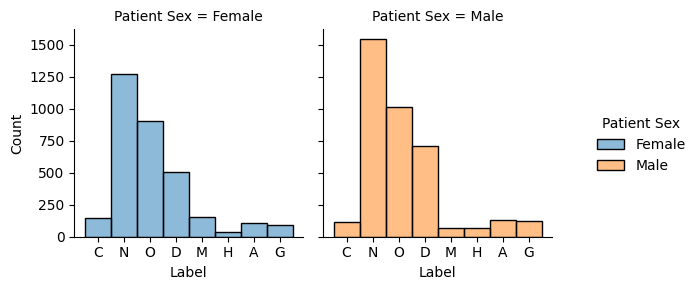

In [85]:
plt.figure(figsize=(6,4), facecolor='white')

sns.displot(
    df_left_right, 
    x="Label", 
    col="Patient Sex",
    binwidth=4, 
    height=3, 
    hue='Patient Sex',
    facet_kws=dict(margin_titles=True),)
plt.show()